In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate

In [2]:
path = Path('/home/andrew/footwear_dataset')
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(), size=224, bs=16).normalize(imagenet_stats)

<bound method DataBunch.show_batch of ImageDataBunch;

Train: LabelList (39 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
slipper,slipper,slipper,slipper,slipper
Path: /home/andrew/footwear_dataset;

Valid: LabelList (13 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
slipper,slipper,slipper,slipper,others
Path: /home/andrew/footwear_dataset;

Test: None>

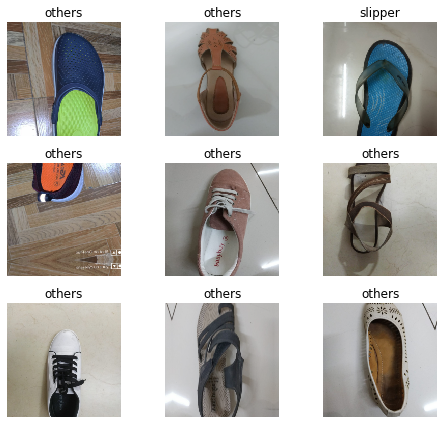

In [3]:
data.show_batch(rows=3, figsize=(7,6))
data.show_batch

In [8]:
print(data.classes)
len(data.classes),data.c

['others', 'slipper']


(2, 2)

In [4]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [107]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [9]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.319142,1.257471,0.153846,00:02
1,0.192769,1.204497,0.230769,00:01
2,0.194196,1.086867,0.230769,00:01
3,0.156516,1.005257,0.230769,00:01
4,0.135592,0.934671,0.230769,00:01
5,0.123130,0.919868,0.230769,00:01
6,0.127035,0.912145,0.230769,00:01
7,0.125268,0.880416,0.153846,00:01


In [10]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

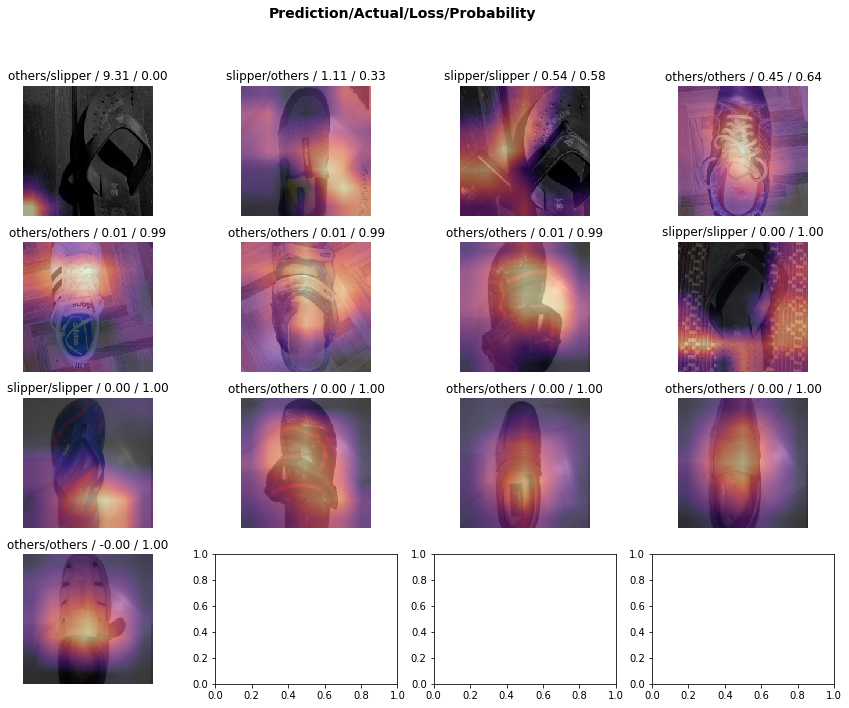

In [14]:
interp.plot_top_losses(13, figsize=(15,11), heatmap=True)